In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import csv
import math
import datetime

In [123]:
# parsivel raw data processing

names = np.array(['Date', 'Time', 'Intensity of precipitation (mm/h)',
               'Precipitation since start (mm)', 'Weather code SYNOP WaWa', 'Weather code METAR/SPECI',
               'Weather code NWS', 'Radar reflectivity (dBz)', 'MOR Visibility (m)',
               'Signal amplitude of Laserband', 'Number of detected particles', 'Temperature in sensor (ºC)',
               'Heating current (A)', 'Sensor voltage (V)', 'Optics status',
               'Kinetic Energy', 'Snow intensity (mm/h)'])
names = np.append(names, ['%.0f' % x for x in np.arange(1, 1025)])
names = np.append(names, ['</SPECTRUM>'])

# add .csv to original Parsivel data file 
file_name = ('2022-10-10-02-24')
df = pd.read_csv(file_name, sep=';', names=names, parse_dates=[['Date', 'Time']], index_col=['Date_Time'],
                 dayfirst=True, infer_datetime_format=True, na_values=[''])

# remove the repeating column names
# use .copy() to avoid warning of SettingWithCopy
# df = df.drop(df[df.iloc[:, 0] == df.iloc[0, 0]].index).copy()
try:
    df = df.drop(index='Date Time')
except:
    pass

# remove the last column
df = df.drop(['</SPECTRUM>'], axis=1)

# convert data type
df.index = pd.to_datetime(df.index).tz_localize('Asia/Taipei')
df.loc[:, names[2]] = df.loc[:, names[2]].astype(float) # Intensity of precipitation (mm/h)

# replace <SPECTRUM> with the value of first DSD cell
df.loc[:, '1'] = df.loc[df.loc[:, '1'] != '<SPECTRUM>ZERO</SPECTRUM>', '1'].str[10:]

# fill NaN with 0
df.iloc[:,:] = df.iloc[:,:].fillna(0)
#　df.iloc[:, 13:1038] = df.iloc[:, 13:1038].astype(int)
df.loc[:, '1'] = pd.to_numeric(df.loc[:, '1'])

# DSD
dsd = df.iloc[:, 15:1039].replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)

# intensity
df = df.resample('5T', label='right', closed='right').mean()
pd.set_option('display.max_columns',None)

# shift 8H backward
df = df.shift(-8, freq='H')

dsd

C:\Users\88690\AppData\Local\Temp\ipykernel_32124\443797839.py:14: DtypeWarning: Columns (1041) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, sep=';', names=names, parse_dates=[['Date', 'Time']], index_col=['Date_Time'],
C:\Users\88690\AppData\Local\Temp\ipykernel_32124\443797839.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, '1'] = pd.to_numeric(df.loc[:, '1'])
C:\Users\88690\AppData\Local\Temp\ipykernel_32124\443797839.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('5T', label

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1

In [106]:
# add pluvioL data
pluvioL = pd.read_csv('Nalgae_pluvioL.csv', skiprows=3)
pluvioL["_value"] = pd.to_numeric(pluvioL["_value"], errors='coerce')
pluvioL["_time"] = pd.to_datetime(pluvioL["_time"], format='%Y-%m-%d'+'T'+'%H:%M:%S'+'Z', errors='coerce')
pluvioL = pluvioL.set_index("_time")
pluvioL = pluvioL.tz_localize('Asia/Taipei')
pluvioL = pluvioL.resample('5T', label='right', closed='right').mean()

pluvioL

C:\Users\88690\AppData\Local\Temp\ipykernel_32124\367978839.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pluvioL = pluvioL.resample('5T', label='right', closed='right').mean()


,Unnamed: 0,result,table,_value
_time,,,,
2022-10-26 19:05:00+08:00,NaN,NaN,0.0,0.0
2022-10-26 19:10:00+08:00,NaN,NaN,0.0,0.0
2022-10-26 19:15:00+08:00,NaN,NaN,0.0,0.0
2022-10-26 19:20:00+08:00,NaN,NaN,0.0,0.0
2022-10-26 19:25:00+08:00,NaN,NaN,0.0,0.0
...,...,...,...,...
2022-11-02 17:25:00+08:00,NaN,NaN,0.0,0.0
2022-11-02 17:30:00+08:00,NaN,NaN,0.0,0.0
2022-11-02 17:35:00+08:00,NaN,NaN,0.0,0.0


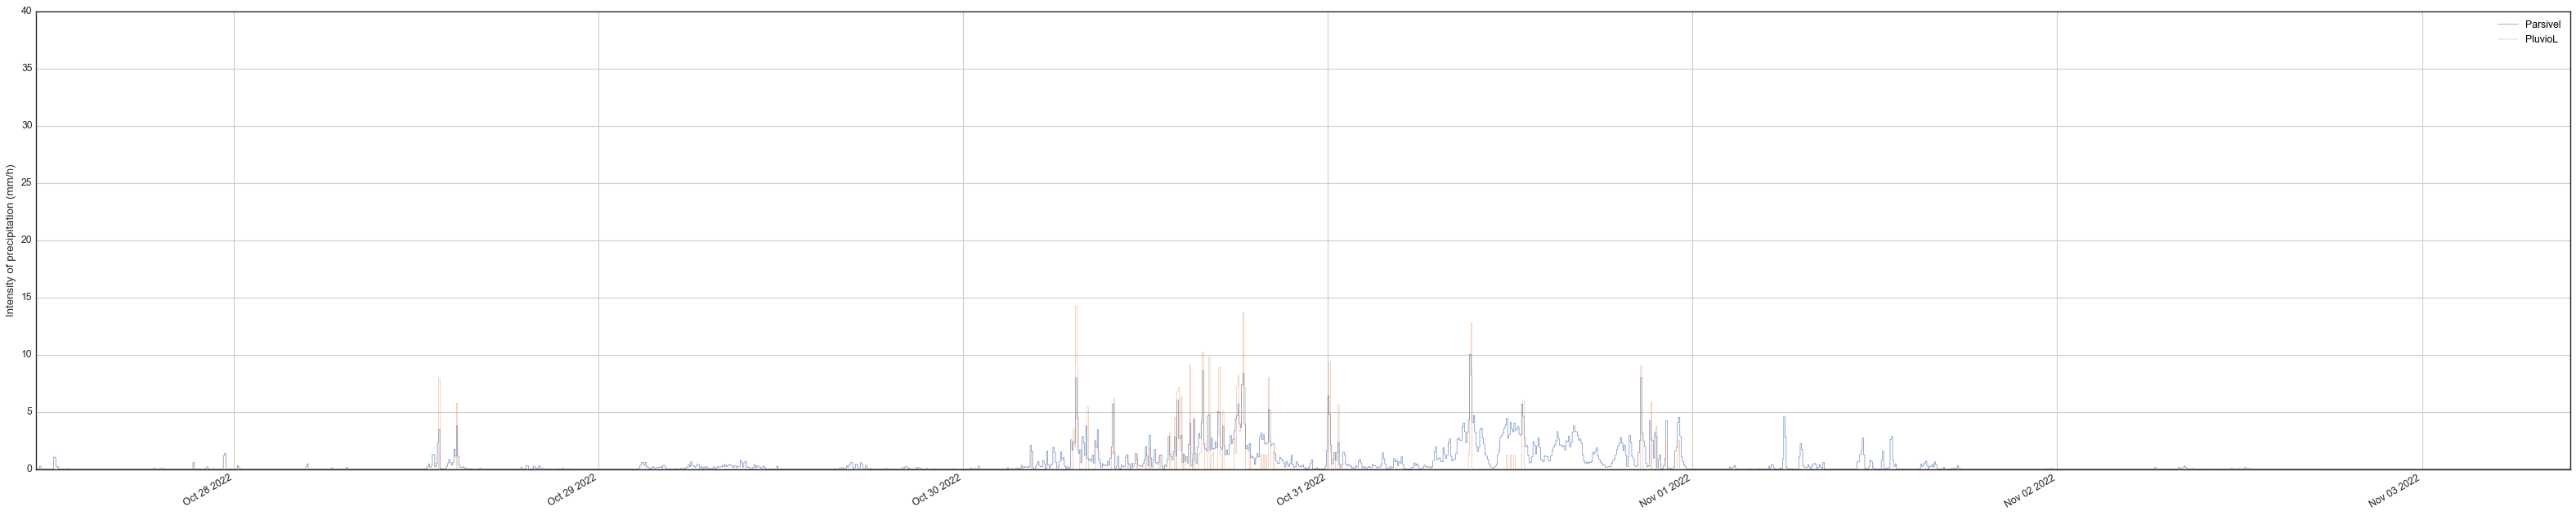

In [109]:
# plot intensity

plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(50,10))

parsivel_intensity = df["Intensity of precipitation (mm/h)"]
pluvioL_intensity = pluvioL["_value"]
Parsivel_intensity = plt.step(df.index, parsivel_intensity, linewidth = 0.5, label="Parsivel")
PluvioL_intensity = plt.step(pluvioL.index, pluvioL_intensity, linewidth = 0.3, label="PluvioL")

plt.gcf().autofmt_xdate()
plt.ylabel("Intensity of precipitation (mm/h)")
plt.legend(labelcolor="black")
plt.grid(True)
plt.xlim([datetime.datetime(2022, 10, 27, 3, 0, 0), 
           datetime.datetime(2022, 11, 3, 1, 45,0)])
plt.ylim(0, 40)

plt.show()

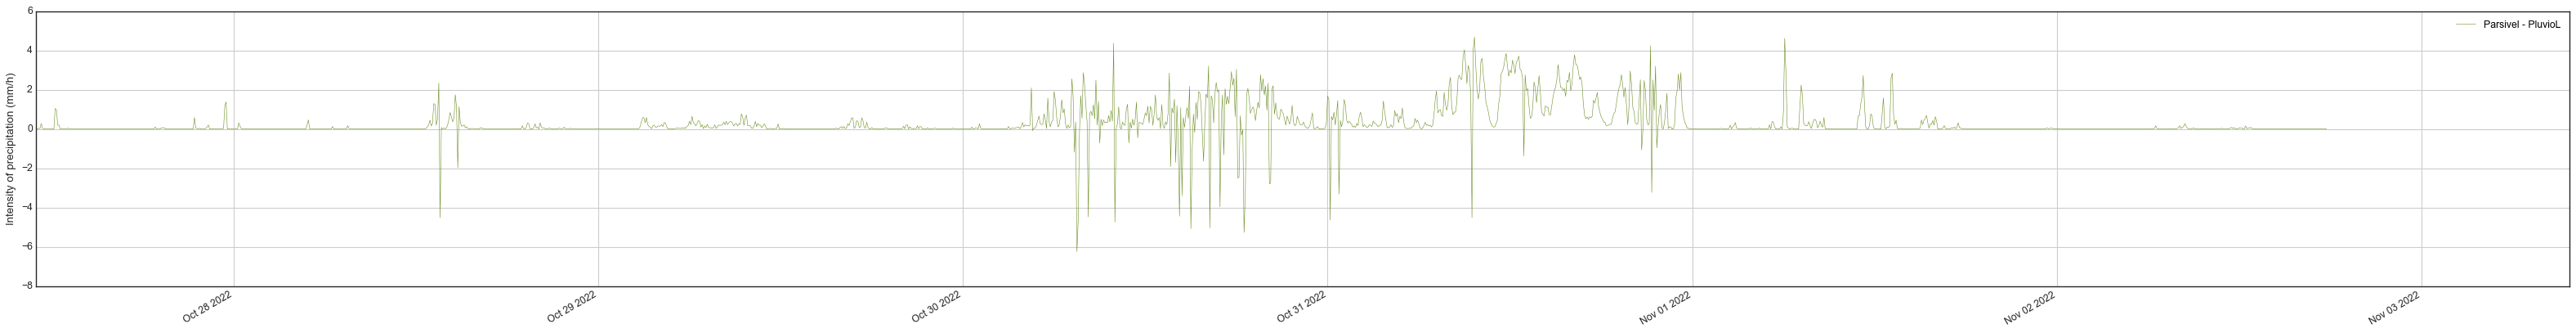

In [108]:
# plot difference of parsivel and pluvioL

plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(50,6))

diff = parsivel_intensity-pluvioL_intensity
difference = plt.plot(diff, linewidth = 0.5, label="Parsivel - PluvioL", color = 'olivedrab')

plt.gcf().autofmt_xdate()
plt.ylabel("Intensity of precipitation (mm/h)")
plt.legend(labelcolor="black")
plt.grid(True)
plt.xlim([datetime.datetime(2022, 10, 27, 3, 0, 0), 
           datetime.datetime(2022, 11, 3, 1, 45,0)])

plt.show()

In [128]:
# extract data from certain time period
start_time = "2022-10-15 16:00:00+08:00"
# start_time = "2022-10-30 15:00:00"
end_time = "2022-10-16 16:00:00+08:00"
# end_time = "2022-10-30 16:00:00"
# filt = (data["Date_Time"] >= start_time) & (data["Date_Time"] <= end_time)
# data = data.loc[filt]

# tranfrom data into 32x32 matrix
array = np.array(dsd.iloc[:, 0:1024].astype(int))
print(array)
# array = np.sum(array, axis=0)
array = np.asarray(np.sum(array, axis=0), dtype=float)
print(array)
mat = np.flip(array.reshape(32, 32), 0)
mat

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0. 0. 0. ... 0. 0. 0.]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 5., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [179]:
# particle speed and diameter class
speed_class = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95,1.1,1.3,1.5,1.7,1.9,
       2.2,2.6,3.0,3.4,3.8,4.4,5.2,6.0,6.8,7.6,8.8,10.4,12.0,13.6,15.2,17.6,20.8])
diameter_class = np.array([0.062,0.187,0.312,0.437,0.562,0.687,0.812,0.937,1.062,1.187,1.375,1.625,1.875,2.125,2.375,
                2.750,3.250,3.750,4.250,4.750,5.500,6.500,7.500,8.500,9.500,11.000,13.000,15.000,17.000,19.000,21.500,24.500])
theo_speed = 9.65 - 10.43 * np.exp(-0.6 * diameter_class[:])

# print(theo_speed)

error_mat = np.zeros([32, 32], float)
theo_speed_mat = np.zeros([32, 32], float)

for i in range(31):
    theo_speed_mat[i][:] = theo_speed

# print(theo_speed_mat)

for i in range(31):
    error_mat[i][:] = speed_class[31-i]

# print(error_mat)

error_mat = np.square(np.subtract(error_mat, theo_speed_mat))

# print(error_mat)

rmse = np.sqrt(np.multiply(error_mat, mat).mean())
print(rmse)

79.95939138263775


In [75]:
# plot every drop
drop = pd.DataFrame()

# 循环遍历矩阵的每个元素
for i in range(32):
    for j in range(32):
        # 获取矩阵元素的值
        value = mat[i][j].astype(int)

        # 根据值重复构建直径和速度的数据列表
        diameter_list = [diameter_class[j]] * value
        speed_list = [speed_class[31-i]] * value

        # 将直径和速度的数据列表添加到DataFrame
        temp_drop = pd.DataFrame({'diameter': diameter_list, 'velocity': speed_list})

        # 将临时DataFrame添加到主DataFrame
        drop = pd.concat([drop, temp_drop], ignore_index=True)

# 打印输出DataFrame
print(drop)

        diameter  velocity
0          3.250      8.80
1          2.375      7.60
2          2.750      7.60
3          2.750      7.60
4          2.750      7.60
...          ...       ...
221151     0.937      0.15
221152     0.937      0.15
221153     0.937      0.15
221154     0.937      0.15
221155     0.937      0.15

[221156 rows x 2 columns]


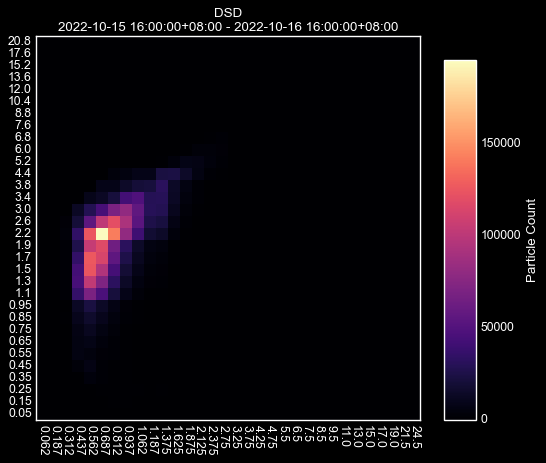

C:\Users\88690\AppData\Local\Temp\ipykernel_32124\1911277695.py:24: RuntimeWarning: divide by zero encountered in log2
  plt.imshow(np.log2(mat), cmap="magma", interpolation="none")


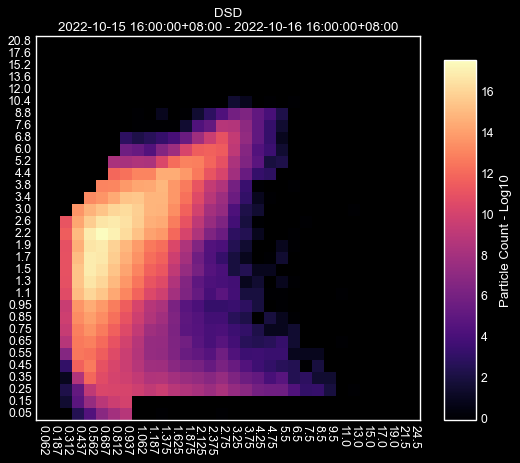

In [130]:
# visualize parsivel data

wt_mat = np.zeros([32, 1], float)
for i in range(0, 32):
    for j in range(0, 32):
        wt_mat[i] += mat[j][i] * speed_class[31 - j]
    if wt_mat[i] != 0.0:
        wt_mat[i] /= np.sum(mat, axis=0)[i]

# mat = mat.astype(float)
plt.figure(figsize=(8, 6))
plt.imshow(mat, cmap="magma", interpolation="none")
title = "DSD" + "\n" + start_time + " - " + end_time
plt.title(title)
plt.xticks(np.arange(0, 32, 1), np.array(diameter_class), rotation=270)
plt.yticks(np.arange(0, 32, 1), np.flipud(np.array(speed_class)))
plt.grid(False)
cax = plt.axes([0.85, 0.1, 0.05, 0.75])
plt.style.use("dark_background")
plt.colorbar(cax=cax)
plt.ylabel("Particle Count")
plt.show()

# mat[mat <= 0] = 1
plt.figure(figsize=(8, 6))
plt.imshow(np.log2(mat), cmap="magma", interpolation="none")
plt.title(title)
plt.xticks(np.arange(0, 32, 1), np.array(diameter_class), rotation=270)
plt.yticks(np.arange(0, 32, 1), np.flipud(np.array(speed_class)))
plt.grid(False)
cax = plt.axes([0.85, 0.1, 0.05, 0.75])
plt.colorbar(cax=cax)
plt.ylabel("Particle Count - Log10")
plt.show()

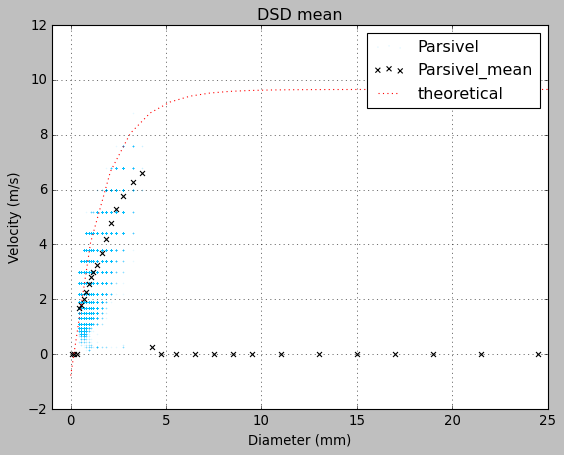

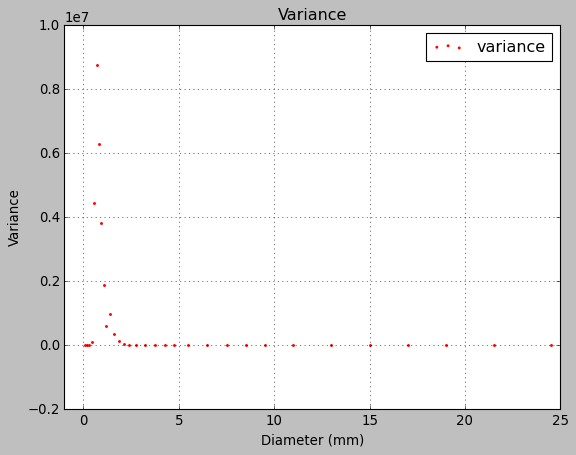

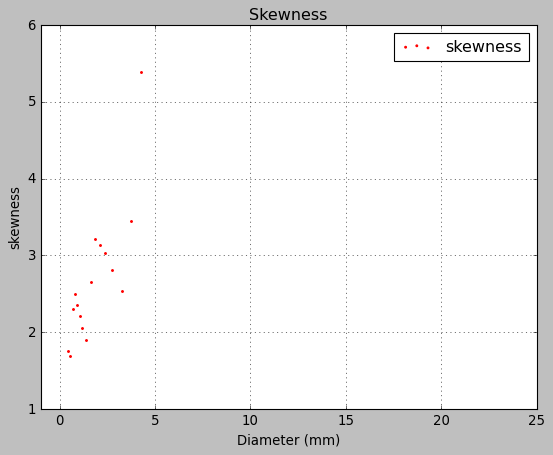

time period =  2022-10-15 16:00:00+08:00  -  2022-10-16 16:00:00+08:00
mse =  5.40190046160871
rmse =  2.32419888598388


In [76]:
from scipy.stats import skew

drop_speed = wt_mat.flatten()

x = np.linspace(0, 25, 25)
y = 9.65 - 10.43 * np.exp(-0.6 * x)
y1 = 9.65 - 10.43 * np.exp(-0.6 * diameter_class[:][1])

plt.style.use("classic")


# add parsivel data
parsivel = plt.scatter(
    drop["diameter"],
    drop["velocity"],
    color="deepskyblue",
    marker=".",
    s=0.01,
    label="Parsivel",
    alpha=1,
)
parsivel_mean = plt.scatter(
    diameter_class, drop_speed, color="black", marker="x", s=20, label="Parsivel_mean"
)
# add theoretical DSD curve
theoretical = plt.plot(x, y, label="theoretical", color="red", linestyle="dotted")

plt.legend(labelcolor="black")
plt.title("DSD mean")
plt.xlabel("Diameter (mm)")
plt.ylabel("Velocity (m/s)")
plt.grid(True)
plt.xlim(-1, 25)
plt.show()

# add variance
var = np.var(mat, axis=0)
variance = plt.scatter(
    diameter_class, var, color="red", marker=".", s=10, label="variance"
)

plt.legend(labelcolor="black")
plt.title("Variance")
plt.xlabel("Diameter (mm)")
plt.ylabel("Variance")
plt.grid(True)
plt.xlim(-1, 25)
plt.show()

# add skewness
skew = skew(mat, axis=0)
skewness = plt.scatter(
    diameter_class, skew, color="red", marker=".", s=10, label="skewness"
)

plt.legend(labelcolor="black")
plt.title("Skewness")
plt.xlabel("Diameter (mm)")
plt.ylabel("skewness")
plt.grid(True)
plt.xlim(-1, 25)
plt.show()


def mse(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual, pred)).mean()


def rmse(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.sqrt(np.square(np.subtract(actual, pred)).mean())


print("time period = ", start_time, " - ", end_time)
print("mse = ", mse(y1, drop["velocity"]))
print("rmse = ", rmse(y1, drop["velocity"]))

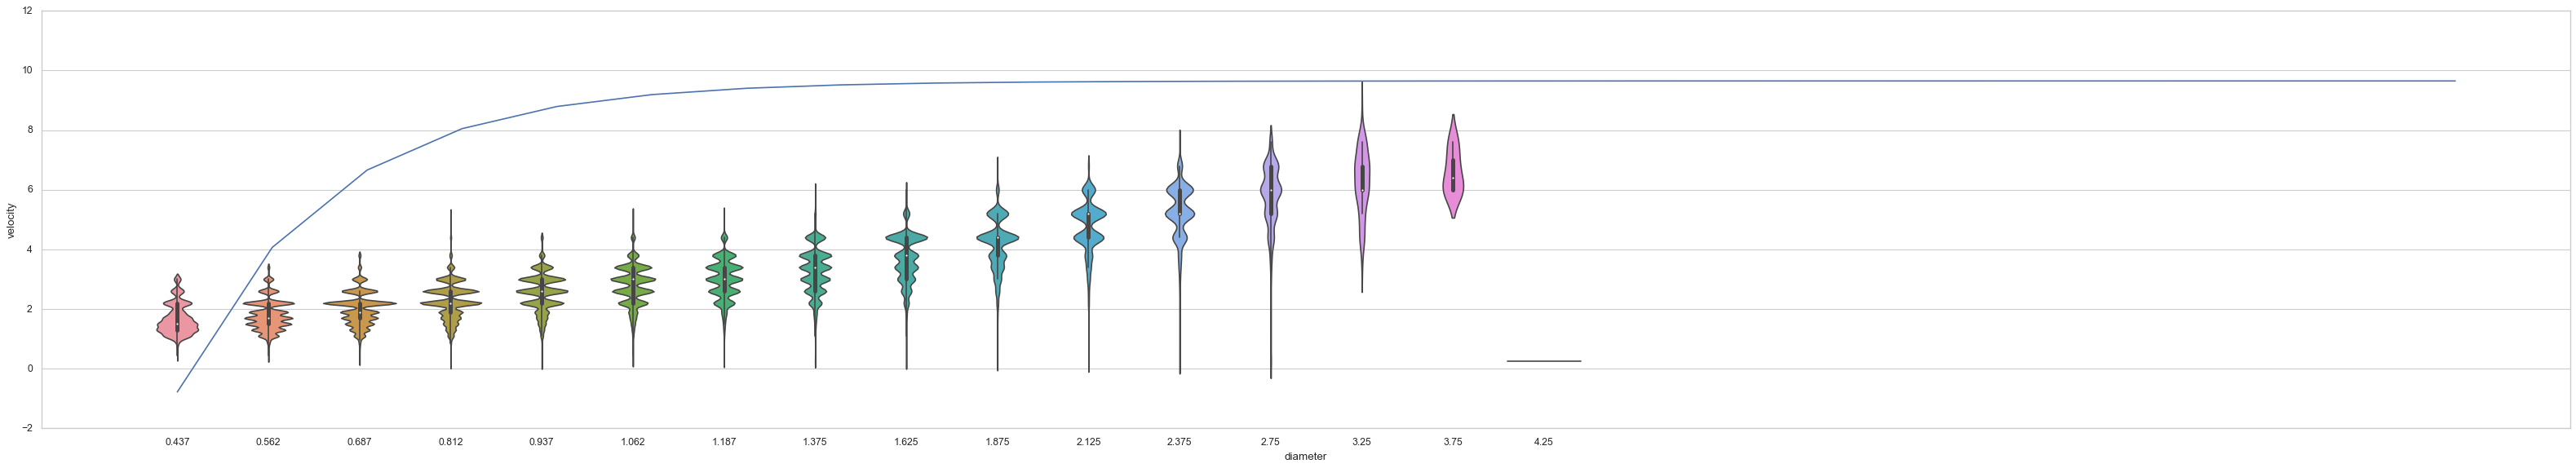

In [77]:
# violinplot
sns.set(rc={"figure.figsize": (50, 8)})
sns.set_style("whitegrid")
sns.violinplot(x=drop["diameter"], y=drop["velocity"])
theoretical2 = sns.lineplot(x=x, y=y)